## 규제(regularization)
- 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것
- overfitting 되지 않도록 만든다. --> 선형 회귀 모델의 경우 특성에 곱해지는 계수 혹은 기울기 크기를 작게 만든다.
- 특성의 스케일이 정규화를 하지 않으면, 계수값의 unit이 다 다르기에 공정하게 제어 불가능.
- 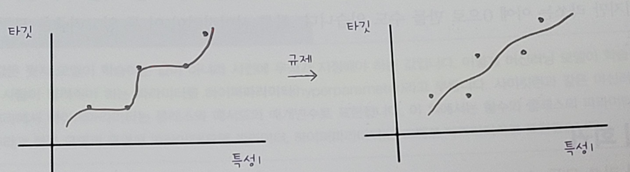
- 왼쪽 그림은 훈련세트를 과도하게 학습 // 오른쪽은 기울기를 줄여 보다 보편적인 패턴으로 학습

- 규제를 적용하기 전, 정규화(평균과 표준편차) 적용하는 이유: 특성의 스케일이 정규화되지 않으면 여기에 곱해지는 계수값도 차이 발생
- 일반적으로 선형 회귀 모델에 규제를 적용할 때, 계수값의 크기가 서로 많이 다르면 공정하게 제어 불가능

### 정규화: 평균과 표준편차 이용
- 사이킷런에서 제공하는 StandardScaler 클래스 이용
- 꼭 훈련세트로 학습한 변환기를 사용해 테스트 세트까지 변환
- 규제하기 전에 정규화를 진행, 이유: 각 특성의 스케일의 계수값이 크기가 다르면 공정하게 규제가 되지 않음.

In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv("https://bit.ly/perch_csv")

## 넘파이 배열로 변경.
perch_full = df.to_numpy()

## Target 데이터 준비
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

### perch_full / perch_weight를 훈련세트와 테스트 세트로 나누기

In [2]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

### [PolynomialFeatures]
#### 1) 1을 제거하기 위해 PolynomialFeatures에서 include_bias=False
#### 2) train_input을 transform 진행.
#### 3) 특성을 더 많이 추가할 경우, 3제곱 4제곱 ==> PolynomialFeatures degree 변경

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print("transform된 train 세트의 모양:", train_poly.shape)
print(poly.get_feature_names())


## test_input을 transform 진행.
test_poly = poly.transform(test_input)


## 다중 회귀 모델 훈련하기.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

## Train 세트 / test 세트 R^2의 확인
print()
print("5제곱까지 PolynomialFeatures")
print("Train 세트 R^2:", lr.score(train_poly, train_target))
print("test 세트 R^2:", lr.score(test_poly, test_target))
print()

transform된 train 세트의 모양: (42, 55)
['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2', 'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1', 'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3', 'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2', 'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2', 'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3', 'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4', 'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5', 'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5']


c:\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



5제곱까지 PolynomialFeatures
Train 세트 R^2: 0.9999999999997439
test 세트 R^2: -144.40564427622337



### test 세트의 R^2 score가 음수이기에 특성을 줄여야 함
### 과도하게 overfitting되어 있는 상황.

-----

## [ overfitting을 줄이는 다른 방법(regularization: 릿지 & 라쏘) ]
### 1) 릿지: 계수를 제곱한 값을 기준으로 규제를 적용
### 2) 라쏘: 계수의 절댓값을 기준으로 규제를 적용.
### 릿지를 조금 더 선호 / 릿지 & 라쏘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수 있다.

### regularization 전에 정규화 진행

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### regularization: 릿지 회귀

In [5]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print("train_scaled R^2:", ridge.score(train_scaled, train_target))
print("test_scaled R^2:", ridge.score(test_scaled, test_target))

train_scaled R^2: 0.9896101671037343
test_scaled R^2: 0.9790693977615391


## 릿지와 라쏘 모델 특징
### 1) 2가지 모델, 모두 규제의 양을 임의로 조절
### 2) 모델 객체를 만들 때, alpha 매개변수로 규제의 강도 조절 가능
    - alpha값이 크면 규제 강도 세고 & 계수값 줄임 => 과소적합 유도
    - alpha값이 작으면 규제 강도 약해짐 & 계수값을 줄이는 역할 감소 => 과대적합될 가능성이 높다.    